In [251]:
# We will implement bare hands linear regression for the Titanic dataset

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('train.csv')

In [252]:
# make a function to clean the data as we did above
def clean_data(dataset):
    # cleaning the data
    dataset = dataset.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
    dataset = dataset.dropna()
    dataset = dataset.reset_index(drop=True)

    # replace embarked with numbers
    dataset['Embarked'] = dataset['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

    # replace sex with numbers
    dataset['Sex'] = dataset['Sex'].replace(['male', 'female'], [0, 1])

    return dataset


dataset = clean_data(dataset)

In [253]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Survived'], axis=1), dataset['Survived'], test_size=0.01, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [254]:
# define weight and bias
# make gaussian distribution
w = np.random.randn(X_train.shape[1])
b = 2

In [255]:
# write Y_hat function Y_hat = Xw + b
def Y_hat(X, w, b):
    return np.dot(X, w) + b

# write cost function
def cost_func(Y, X, w, b):
    Y_ht = Y_hat(X, w, b)
    m = X.shape[0]
    cost = (1/(2*m))*np.sum((Y - Y_ht)**2)
    params = {'w': w, 
              'b': b,
              'cost': cost,
              'Y_hat': Y_ht,
              'm': m}
    return params

In [256]:
# write a function to partial derivative of cost function
def partial_derivative(X, Y, w, b):
    params = cost_func(y_train, X_train, w, b)
    Y_ht = params['Y_hat']
    m = params['m']
    dw = (1/m)*np.dot(X.T, (Y_ht - Y))
    db = (1/m)*np.sum(Y_ht - Y)
    return dw, db

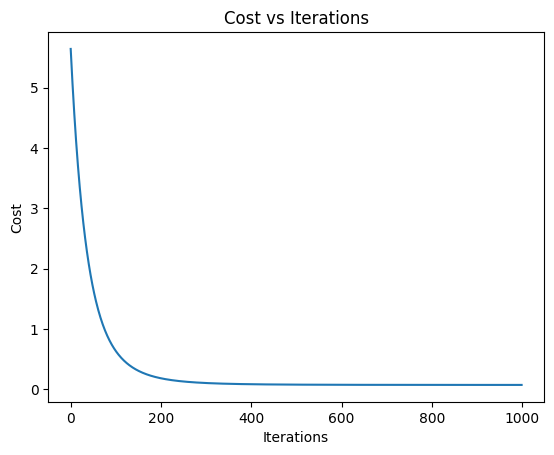

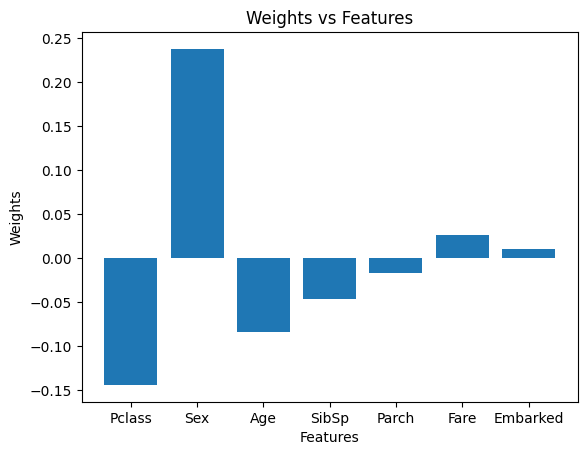

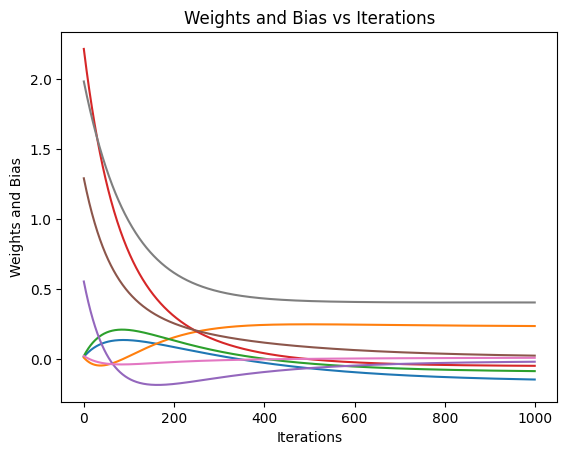

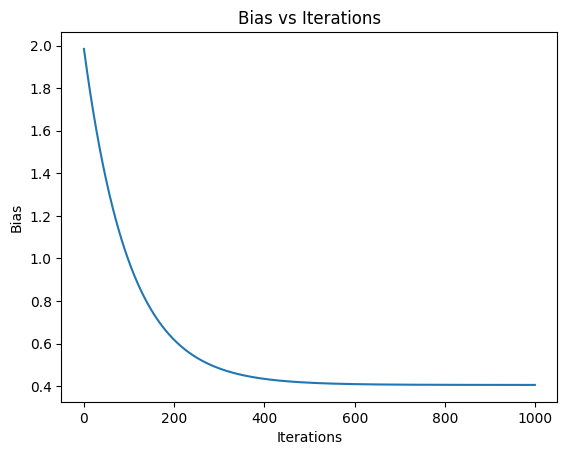

In [257]:
# define learning rate
alpha = 0.01

# write a function to update the parameters
def update_params(X, Y, w, b, alpha):
    dw, db = partial_derivative(X, Y, w, b)
    w = w - alpha*dw
    b = b - alpha*db
    return w, b

# write a function to train the model
def train_model(X, Y, w, b, alpha, iterations):
    costs = []
    weights = []
    biases = []
    for i in range(iterations):
        w, b = update_params(X, Y, w, b, alpha)
        cost = cost_func(Y, X, w, b)['cost']
        costs.append(cost)
        weights.append(w)
        biases.append(b)
    params = {'w': w, 
              'b': b,
              'costs': costs,
              'weights': weights,
              'biases': biases}
    return params

# train the model
params = train_model(X_train, y_train, w, b, alpha, 1000)

# plot the cost function
plt.plot(params['costs'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# plot weights vs features
plt.bar(dataset.drop(['Survived'], axis=1).columns, params['w'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights vs Features')
plt.show()

# plot weights and bias vs iterations
plt.plot(params['weights'])
plt.plot(params['biases'])
plt.xlabel('Iterations')
plt.ylabel('Weights and Bias')
plt.title('Weights and Bias vs Iterations')
plt.show()

# plot only bias vs iterations
plt.plot(params['biases'])
plt.xlabel('Iterations')
plt.ylabel('Bias')
plt.title('Bias vs Iterations')
plt.show()






In [258]:
# make predictions
y_pred = Y_hat(X_test, params['w'], params['b'])
y_pred = (y_pred > 0.5)

# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# calculate accuracy
accuracy = (cm[0][0] + cm[1][1])/np.sum(cm)
print('Accuracy: ', accuracy)

# calculate precision
precision = cm[1][1]/(cm[1][1] + cm[0][1])
print('Precision: ', precision)



Accuracy:  0.875
Precision:  0.6666666666666666


In [259]:
# load the new test data and clean it
test_data = pd.read_csv('test.csv')
# drop the columns that we dropped in the training data
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
# replace embarked with numbers
test_data['Embarked'] = test_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

# replace sex with numbers
test_data['Sex'] = test_data['Sex'].replace(['male', 'female'], [0, 1])

# replace missing values with mean
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

# drop the passenger id column into a new slice 
passenger_id = test_data['PassengerId']
test_data = test_data.drop(['PassengerId'], axis=1)




# make predictions
test_data = sc.transform(test_data)
y_pred = Y_hat(test_data, params['w'], params['b'])
y_pred = (y_pred > 0.45)

# convert to int
y_pred = y_pred.astype(int)

# make a submission file
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)

# show the survival rate
print('Survival Rate: ', np.sum(y_pred)/len(y_pred))






Survival Rate:  0.40669856459330145
